In [123]:
from CoursePythonCode.Chapter2.CreateDataset import CreateDataset
from CoursePythonCode.util.VisualizeDataset import VisualizeDataset
from CoursePythonCode.util import util
import copy
import os
import pandas as pd
#%pylab inline

In [124]:
dataset_folder = './datasets/course_data/csv/'

result_dataset_path = os.path.join(dataset_folder + 'intermediate_datafiles')
if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

In [127]:
granularities = [60000, 60000]
datasets = []

#milliseconds_per_instance = 250
DataSet = CreateDataset(dataset_folder, milliseconds_per_instance)


    
    

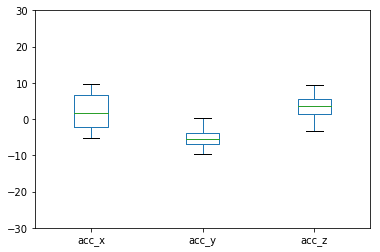

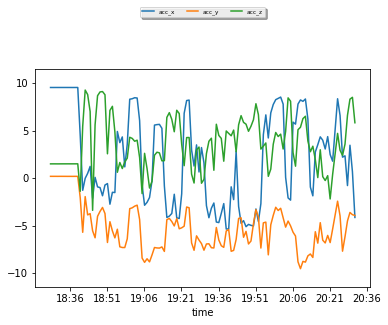

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.00806451612903 2.11091488398 4.8684807445 -5.35044994145 9.55155236661
acc_y 0.00806451612903 -5.13275357209 2.45193175781 -9.52124667895 0.199101591187
acc_z 0.00806451612903 3.61151842097 2.73937101443 -3.38064370291 9.28081559947


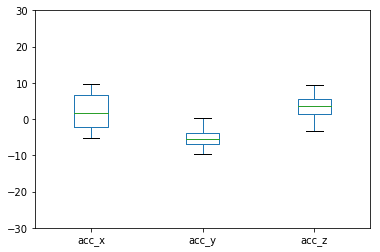

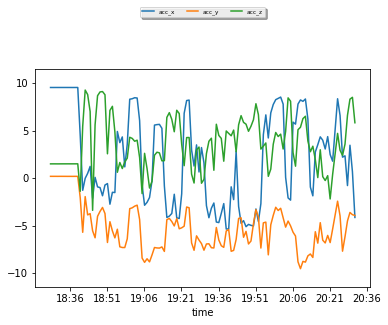

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.00806451612903 2.11091488398 4.8684807445 -5.35044994145 9.55155236661
acc_y 0.00806451612903 -5.13275357209 2.45193175781 -9.52124667895 0.199101591187
acc_z 0.00806451612903 3.61151842097 2.73937101443 -3.38064370291 9.28081559947


In [128]:
for milliseconds_per_instance in granularities:
    DataSet.add_numerical_dataset('accelerometer_smartwatch_large.csv', 'timestamps', ['x', 'y', 'z'], 'avg', 'acc_')
#DataSet.add_numerical_dataset('bmi160_gyroscope.csv', 'timestamps', ['x', 'y', 'z'], 'avg', 'gyro_')

    
    dataset = DataSet.data_table
    
    DataViz = VisualizeDataset()
    
    DataViz.plot_dataset_boxplot(dataset, ['acc_x', 'acc_y', 'acc_z'])

    DataViz.plot_dataset(dataset, ['acc_'],['like'],['line'])
    
    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

In [100]:
dataset = DataSet.data_table

In [101]:
dataset.head(10)

,acc_x,acc_y,acc_z
1970-01-01 00:24:57.147985840,5.12474,-4.05105,1.29435


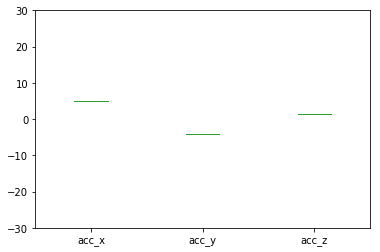

In [86]:
DataViz = VisualizeDataset()
#DataViz.plot_dataset_boxplot(dataset, ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
DataViz.plot_dataset_boxplot(dataset, ['acc_x', 'acc_y', 'acc_z'])

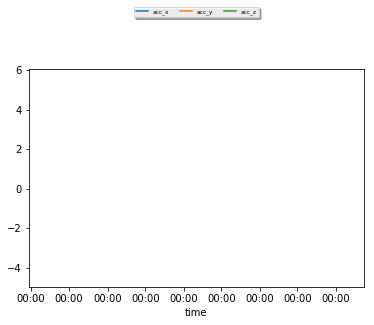

In [88]:
#DataViz.plot_dataset(dataset, ['acc_', 'gyro_'],['like', 'like'],['line', 'line'])
DataViz.plot_dataset(dataset, ['acc_'],['like'],['line'])